In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf

In [3]:
tf.enable_eager_execution()

In [4]:
tf.__version__

'1.15.2'

In [5]:
import numpy as np

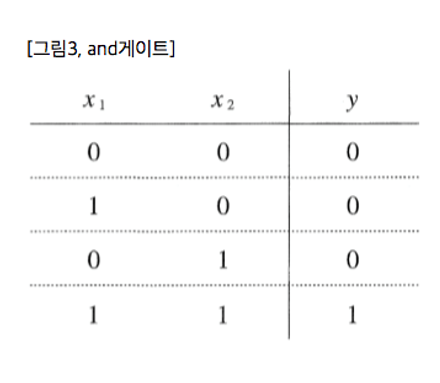

In [6]:
np.array(
    [
     [0 , 0],
     [0 , 1],
     [1 , 0],
     [1 , 1]
    ]
 , dtype="float32")

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32)

In [7]:
X = np.array(
              [
              [0 , 0],
              [0 , 1],
              [1 , 0],
              [1 , 1]
              ]
          , dtype="float32")

In [8]:
X

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32)

In [9]:
y = np.array([
              [0],
              [0],
              [0],
              [1]
              ], dtype="float32")

In [10]:
y

array([[0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [11]:
w = tf.Variable([[1],[2]] , dtype="float32")

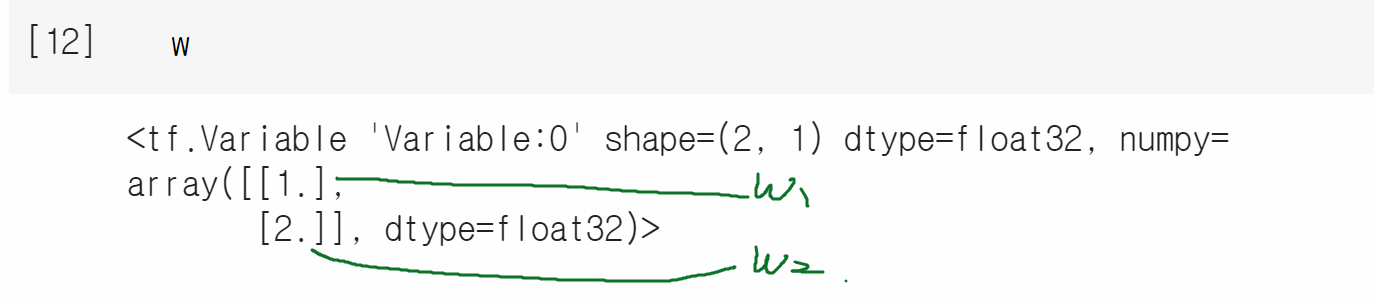

In [12]:
w

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[1.],
       [2.]], dtype=float32)>

In [13]:
b = tf.Variable([3], dtype="float32")

In [14]:
b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([3.], dtype=float32)>

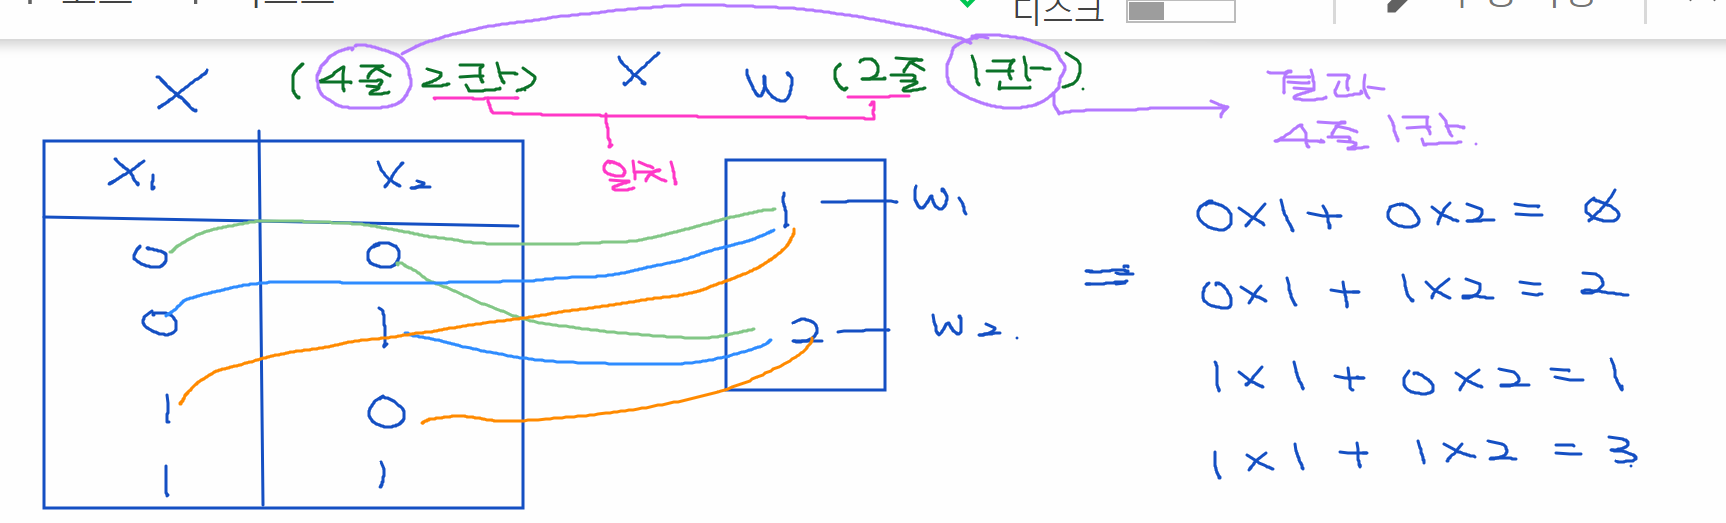

In [15]:
tf.matmul(X , w)

<tf.Tensor: id=21, shape=(4, 1), dtype=float32, numpy=
array([[0.],
       [2.],
       [1.],
       [3.]], dtype=float32)>

In [16]:
tf.matmul(X , w) + b

<tf.Tensor: id=26, shape=(4, 1), dtype=float32, numpy=
array([[3.],
       [5.],
       [4.],
       [6.]], dtype=float32)>

In [17]:
tf.sigmoid( tf.matmul(X , w) + b )

<tf.Tensor: id=32, shape=(4, 1), dtype=float32, numpy=
array([[0.95257413],
       [0.9933072 ],
       [0.98201376],
       [0.9975274 ]], dtype=float32)>

In [18]:
tf.train.AdamOptimizer(0.1)

In [19]:
optimizer = tf.train.AdamOptimizer(0.1)

In [20]:
optimizer

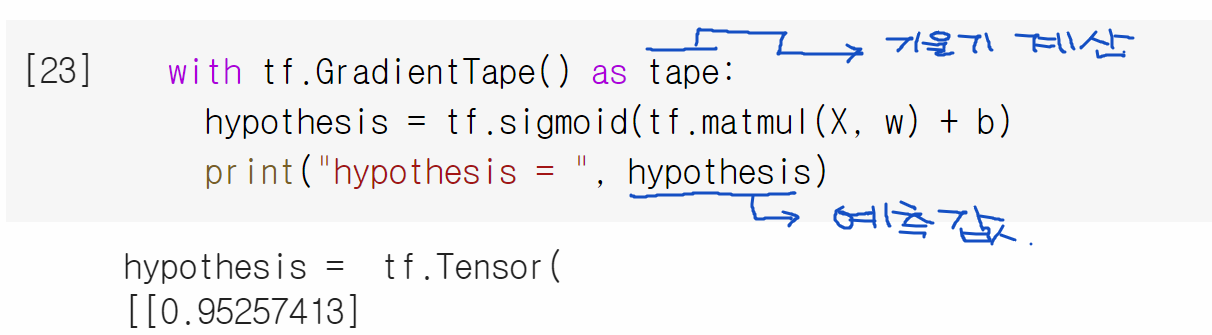

In [21]:
with tf.GradientTape() as tape:
  hypothesis = tf.sigmoid(tf.matmul(X, w) + b)
  print("hypothesis = ", hypothesis)

hypothesis =  tf.Tensor(
[[0.95257413]
 [0.9933072 ]
 [0.98201376]
 [0.9975274 ]], shape=(4, 1), dtype=float32)


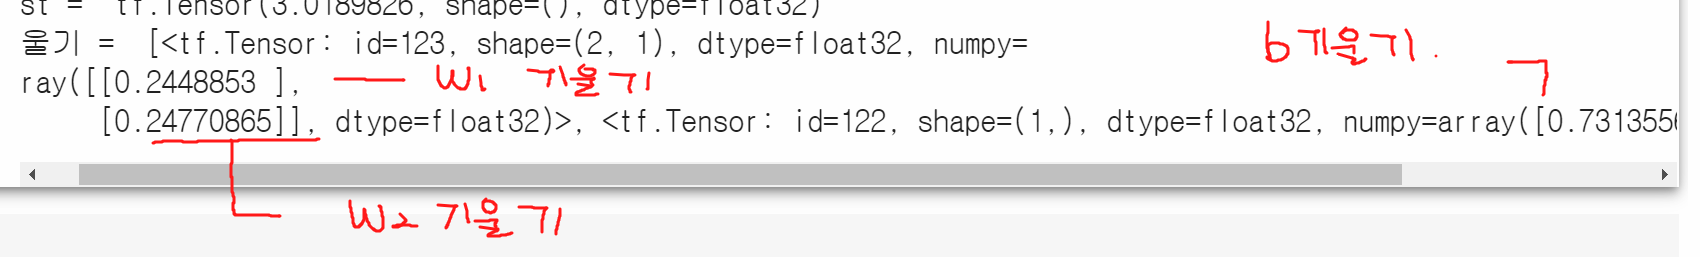

In [22]:
with tf.GradientTape() as tape:
  hypothesis = tf.sigmoid(tf.matmul(X, w) + b)
  print("hypothesis = ", hypothesis)
  cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1-y) * tf.log(1 - hypothesis))
  print("cost = ", cost)
  grads = tape.gradient(cost, [w, b])
  print("기울기 = ", grads)

hypothesis =  tf.Tensor(
[[0.95257413]
 [0.9933072 ]
 [0.98201376]
 [0.9975274 ]], shape=(4, 1), dtype=float32)
cost =  tf.Tensor(3.0189826, shape=(), dtype=float32)
기울기 =  [<tf.Tensor: id=90, shape=(2, 1), dtype=float32, numpy=
array([[0.2448853 ],
       [0.24770865]], dtype=float32)>, <tf.Tensor: id=89, shape=(1,), dtype=float32, numpy=array([0.7313556], dtype=float32)>]


In [23]:
with tf.GradientTape() as tape:
  hypothesis = tf.sigmoid(tf.matmul(X, w) + b)
  print("hypothesis = ", hypothesis)
  cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1-y) * tf.log(1 - hypothesis))
  print("cost = ", cost)
  grads = tape.gradient(cost, [w, b])
  print("기울기 = ", grads)

  optimizer.apply_gradients(grads_and_vars = zip(grads, [w , b]))

hypothesis =  tf.Tensor(
[[0.95257413]
 [0.9933072 ]
 [0.98201376]
 [0.9975274 ]], shape=(4, 1), dtype=float32)
cost =  tf.Tensor(3.0189826, shape=(), dtype=float32)
기울기 =  [<tf.Tensor: id=141, shape=(2, 1), dtype=float32, numpy=
array([[0.2448853 ],
       [0.24770865]], dtype=float32)>, <tf.Tensor: id=140, shape=(1,), dtype=float32, numpy=array([0.7313556], dtype=float32)>]


In [24]:
w

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.9000001],
       [1.9000001]], dtype=float32)>

In [25]:
b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.9], dtype=float32)>

In [26]:
for step in range(1000):
  with tf.GradientTape() as tape:
    print("step = ", step)
    hypothesis = tf.sigmoid(tf.matmul(X, w) + b)
    print("hypothesis = ", hypothesis)
    cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1-y) * tf.log(1 - hypothesis))
    print("cost = ", cost)
    grads = tape.gradient(cost, [w, b])
    print("grads (기울기) = ", grads)

    optimizer.apply_gradients(grads_and_vars = zip(grads, [w , b]))
    print("w = ", w)
    print("b = " , b)
    print("="*100)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
w =  <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[6.377023],
       [6.381976]], dtype=float32)>
b =  <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-9.657976], dtype=float32)>
step =  667
hypothesis =  tf.Tensor(
[[6.3909662e-05]
 [3.6403768e-02]
 [3.6230426e-02]
 [9.5693487e-01]], shape=(4, 1), dtype=float32)
cost =  tf.Tensor(0.02951746, shape=(), dtype=float32)
grads (기울기) =  [<tf.Tensor: id=44947, shape=(2, 1), dtype=float32, numpy=
array([[-0.00170868],
       [-0.00166534]], dtype=float32)>, <tf.Tensor: id=44946, shape=(1,), dtype=float32, numpy=array([0.00740824], dtype=float32)>]
w =  <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[6.3817997],
       [6.386752 ]], dtype=float32)>
b =  <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-9.665132], dtype=float32)>
step =  668
hypothesis =  tf.Tensor(
[[6.3454019e-05]
 [3.6320396e-02]
 [3.6147453e-02]
 [9.5703357e-01]]

In [27]:
w

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[7.7007647],
       [7.7056084]], dtype=float32)>

In [28]:
b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-11.641624], dtype=float32)>

In [29]:
tf.matmul(X , w) + b

<tf.Tensor: id=67216, shape=(4, 1), dtype=float32, numpy=
array([[-11.641624 ],
       [ -3.936016 ],
       [ -3.9408598],
       [  3.7647486]], dtype=float32)>

In [30]:
tf.sigmoid( tf.matmul(X , w) + b )

<tf.Tensor: id=67222, shape=(4, 1), dtype=float32, numpy=
array([[8.7923081e-06],
       [1.9151893e-02],
       [1.9061115e-02],
       [9.7735137e-01]], dtype=float32)>

In [31]:
predict = tf.sigmoid( tf.matmul(X , w) + b )

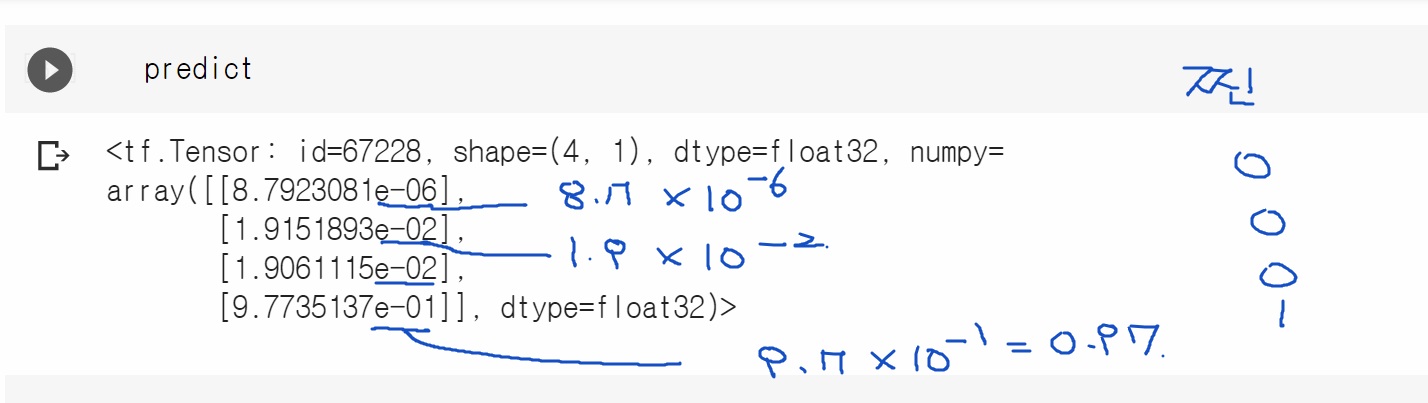

In [32]:
predict

<tf.Tensor: id=67228, shape=(4, 1), dtype=float32, numpy=
array([[8.7923081e-06],
       [1.9151893e-02],
       [1.9061115e-02],
       [9.7735137e-01]], dtype=float32)>

In [33]:
tf.cast(predict > 0.5 , dtype="float32")

<tf.Tensor: id=67231, shape=(4, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [1.]], dtype=float32)>

In [34]:
predict1 = tf.cast(predict > 0.5 , dtype="float32")

In [35]:
predict1

<tf.Tensor: id=67234, shape=(4, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [1.]], dtype=float32)>

In [36]:
tf.equal(predict1 , y)

<tf.Tensor: id=67236, shape=(4, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True]])>

In [39]:
ac01 = tf.equal(predict1 , y)

In [40]:
ac01

<tf.Tensor: id=67240, shape=(4, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True]])>

In [41]:
tf.cast(ac01, dtype="float32")

<tf.Tensor: id=67241, shape=(4, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

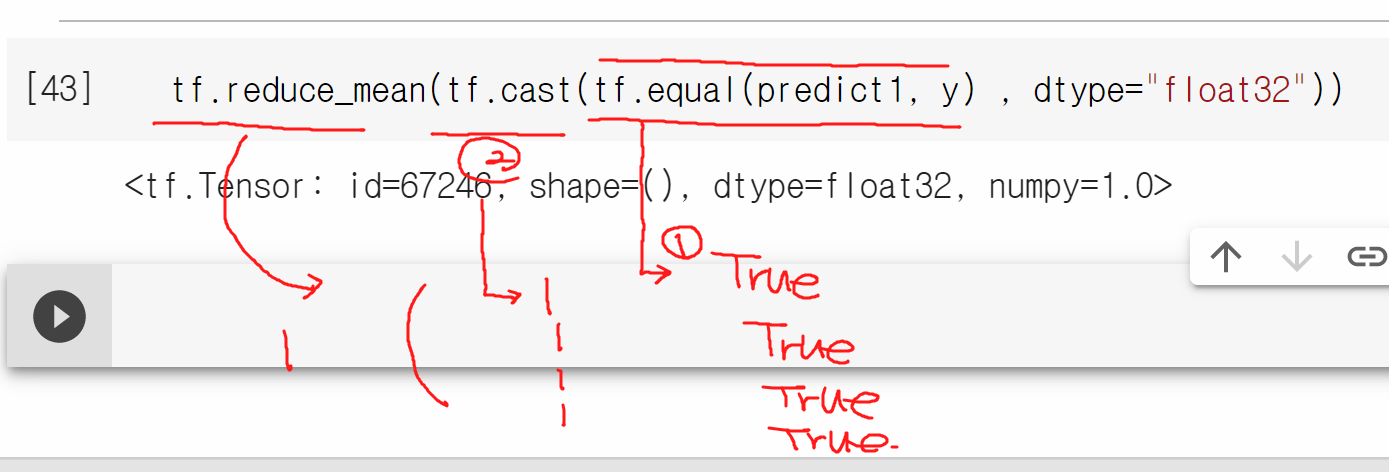

In [43]:
tf.reduce_mean(tf.cast(tf.equal(predict1, y) , dtype="float32"))

<tf.Tensor: id=67246, shape=(), dtype=float32, numpy=1.0>